In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(40)

# Introduction

The neural network models were inspired by the human brain and present (XXX, w) a mathematical model of the brain (XXX, w).

![Single perceptron example](./01-single-perceptron-example-1.png)

The following data table is an example of an input with three features (columns) and four samples (rows).

In [3]:
inputs = pd.DataFrame({
    "x0": [1, 1, 1, 1],  # bias
    "x1": [1, 2.5, 8, 7],
    "x2": [2, 3, 4, 5],
})
inputs

,x0,x1,x2
0,1,1.0,2
1,1,2.5,3
2,1,8.0,4
3,1,7.0,5


In [4]:
target = np.array([0.1, 2, 3, 2])
target

array([0.1, 2. , 3. , 2. ])

In [5]:
w = np.array([0.1, 0.2, 0.3])
w

array([0.1, 0.2, 0.3])

The neuron receives the weighted sum of the inputs for each sample (observation).

$$
z = x_1 w_1 + x_2 w_2 + x_3 w_3
$$

The weights describe the importance of the inputs for the neuron.

After receiving the weighted sum of the inputs, the neuron passes this sum to an activation function. For now, let's consider the identity activation function, i.e. the neuron simply passes its net value forward.


In [6]:
sample1 = inputs.iloc[0]

In [7]:
z = np.sum(sample1 * w)
z

0.9

Alternatively, we can compute the dot product of the weights and the inputs as follows

In [8]:
sample1.dot(w)

0.9

More generally, for arbitrary weights and inputs, the *net value* of the neuron is given by the dot product of the weights and the inputs. Its output value if the net value passed through its activation function.

![Single perceptron example](./01-single-perceptron-1.png)

## Loss function

In order to train the neuron, we need a loss function that measures the error of the prediction. For regression problems, the squared residual is often used. Once you have a loss function, you can use gradient descent to find the weights that minimize the loss function.

Let's see how the squared residual looks like for our example. For the sake of simplicity, we will subsume the bias term in the weights, and we will count from one (a feature with index 1 will be the feature corresponding to the bias weight).

We are already familiar with the mean squared error (MSE) loss function from basic linear model courses. Given $n$ samples (we called these observations in statistics), the MSE is defined as the average squared residual.

$$
\text{MSE} = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2
$$


In [9]:
# If we have one sample (observation), the MSE is simply the squared residual

y_hat = sample1.dot(w)
(target[0] - y_hat) ** 2

0.6400000000000001

In [10]:
# For multiple samples, we need to average the squared residuals
1 / 4 * np.sum((target - inputs.dot(w)) ** 2)

0.475

In linear regression analysis, we chose the model coefficients that minimize the MSE. As the model was simple enough, we could derive a formula for the optimal coefficients.

In the case of neural networks, the model is more complex, and we cannot derive a formula for the optimal weights. Instead, we will use gradient descent to find the optimal weights.

The gradient descent algorithm is an iterative algorithm that starts with an initial guess for the weights and then updates the weights in the direction of the negative gradient of the loss function. The gradient is the vector of partial derivatives of the loss function with respect to the weights.

$$
\nabla_w J(w) = \left(\frac{\partial J(w)}{\partial w_1}, \ldots, \frac{\partial J(w)}{\partial w_p}\right)
$$
To illustrate the gradient descent algorithm, let's compute the gradient of the MSE loss function for our example.

$$
\begin{align}
\frac{\partial J(w)}{\partial w} & = \frac{\partial}{\partial w} \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 \\
& = \frac{1}{n} \sum_{i = 1}^{n} \frac{\partial}{\partial w} (y_i - \hat{y}_i)^2 \\
& = \frac{1}{n} \sum_{i = 1}^{n} 2(y_i - \hat{y}_i) \frac{\partial}{\partial w} (y_i - \hat{y}_i) \\
& = \frac{1}{n} \sum_{i = 1}^{n} 2(y_i - \hat{y}_i) \frac{\partial}{\partial w} (y_i - x_i w) \\
& = \frac{1}{n} \sum_{i = 1}^{n} 2(y_i - \hat{y}_i) (-x_i) \\
& = \frac{1}{n} \sum_{i = 1}^{n} -2(y_i - \hat{y}_i) x_i \\
\end{align}
$$
We can write the sum in a matrix form as follows:

$$
\frac{\partial J(w)}{\partial w} = -\frac{2}{n} X^T(y - \hat{y})
$$
Setting this derivative to zero and solving for $w$ gives us the least squares formula for the optimal weights:

$$
w = (X^T X)^{-1} X^T y
$$

Here we will find the optimal weights using gradient descent. We will start with an initial guess for the weights and then update the weights in the direction of the negative gradient of the loss function.

$$
w^{k + 1} = w^{k} - \eta \frac{\partial J(w)}{\partial w}
$$

where $\eta$ is a hyperparameter of the algorithm called the learning rate.


In [11]:
model_lireg = {
    "w1": np.random.rand(3)
}

print("Initial weights (random)")
print(model_lireg["w1"])


def forward(inp, model):
    w1 = model["w1"]
    prediction = inp.dot(w1)
    return prediction


def loss(actual, prediction):
    return np.mean((actual - prediction) ** 2)


def backward(inp, actual, prediction):
    return -2 / len(inp) * inp.T.dot(actual - prediction)


def update(model, gradient, learning_rate):
    model["w1"] = model["w1"] - learning_rate * gradient


def train(inp, actual, model, learning_rate, epochs):
    for epoch in range(epochs):
        prediction = forward(inp, model)
        gradient = backward(inp, actual, prediction)
        update(model, gradient, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss: {loss(actual, prediction)}")
    return model


train(inp=inputs, actual=target, model=model_lireg, learning_rate=0.01, epochs=int(5e3))
print("Final weights")
print(model_lireg["w1"])


Initial weights (random)
[0.40768703 0.05536604 0.78853488]
Epoch 0, loss: 3.2752610699915605
Epoch 100, loss: 0.360109817770056
Epoch 200, loss: 0.35090575065311397
Epoch 300, loss: 0.34881958131011137
Epoch 400, loss: 0.347148837880945
Epoch 500, loss: 0.345760359879551
Epoch 600, loss: 0.3446058587102899
Epoch 700, loss: 0.3436458992939786
Epoch 800, loss: 0.3428476998664324
Epoch 900, loss: 0.3421840027182179
Epoch 1000, loss: 0.3416321432588461
Epoch 1100, loss: 0.3411732760424997
Epoch 1200, loss: 0.34079173121498657
Epoch 1300, loss: 0.34047447940397024
Epoch 1400, loss: 0.34021068677900085
Epoch 1500, loss: 0.3399913450870958
Epoch 1600, loss: 0.33980896402995553
Epoch 1700, loss: 0.3396573154778049
Epoch 1800, loss: 0.33953122078502307
Epoch 1900, loss: 0.3394263739445998
Epoch 2000, loss: 0.33933919454232464
Epoch 2100, loss: 0.33926670548924204
Epoch 2200, loss: 0.3392064313570535
Epoch 2300, loss: 0.33915631384473177
Epoch 2400, loss: 0.3391146414896077
Epoch 2500, loss: 0.

For comparison, let's see how the sklearn implementation of linear regression performs on the same data.

In [12]:
from sklearn.linear_model import LinearRegression

# We suppress the intercept in the sklearn model, because we already have a constant term in the inputs
model_sklearn = LinearRegression(fit_intercept=False)
model_sklearn.fit(inputs, target)
model_sklearn.coef_

array([ 0.64611307,  0.33780919, -0.12385159])

As you can see, the weights are very similar to the ones we found with gradient descent, however, the sklearn model is much faster. The speed of OLS comes at the cost of not being able to handle more complex models.

Before we move on, let's see how the logistic regression model can be implemented as a neural network.

For binary classification problems, the logistic regression model assumes that the target variable is distributed according a binomial distribution with one trial ($n = 1$, Bernoulli distribution). For simplicity, we will assume that the design matrix $\mathbf{X}$ includes a constant term.

$$
i = 1,\ldots, N \quad \text{observations}\\
p_i = \text{Pr}(y_i = 1) \\
y_i \sim \text{Binom}(n = 1, p_i) \\
\text{logit}(p_i) = \mathbf{X}_{N\times K} \beta_{K \times 1}
$$

The logit function is defined as: 

$$
f(p) = \log \frac{p}{1 - p}
$$

Assuming independence, the likelihood for this distribution is given by

$$
L(\beta) = \prod \hat{p}_{i}^{y_i}(1 - \hat{p}_{i})^{1 - y_i}
$$

and therefore the log-likelihood is

$$
l(\beta) = \sum_{i = 1}^{n} \log\left(\hat{p}_{i}^{y_i}(1 - \hat{p}_{i})^{1 - y_i}\right) = \sum_{i = 1}^{n}\left(y_i \log(\hat{p}_{i}) + (1 - y_i)\log(1 - \hat{p}_{i})\right)
$$

Given an estimate $\hat{\beta}$ for $\beta$, the predicted probabilities are:

$$
\text{logit}(\hat{p}_i) = \mathbf{X}\beta
$$


If we set it equal to some value $x$, solving for $p$ yields:

$$
\begin{align}
\frac{p}{1 - p} & = e^x \\
p & = (1 - p)e^x \\
p(1 + e^x) & = e^x\\
p & = \frac{e^x}{1 + e^x} \frac{e^{-x}}{e^{-x}} \\
p & = \frac{1}{1 + e^{-x}}
\end{align}
$$

Therefore, the predicted probabilities are


$$
\hat{p} = \frac{1}{1 + e^{-(\mathbf{X}\beta)}
$$

The last function is a special case of the logistic function and is often called the *sigmoid* function.

Given a neural network with one output neuron with sigmoid activation the prediction of the network will be
identical to the ones of the logistic regression.

$$
\hat{p} = \sigma(\mathbf{X} w) = \frac{1}{1 + e^{-(\mathbf{X} w)}
$$


An often used activation function for classification tasks is the sigmoid function (a special case of the logistic function).

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Using this notation, we can write the prediction of the logistic regression as

$$
\hat{p} = \sigma(\mathbf{X} \beta)
$$

## Note

More generally, the logistic function is defined as: 

$$
f(x) = \frac{M}{1 - e^{(x - \mu) / s}}
$$

The logistic function maps $x \in \mathbb{R}$ to the interval $(0, M)$. Thus, the sigmoid function is a special case with $M = 1, s = 1$, and $\mu = 0$.


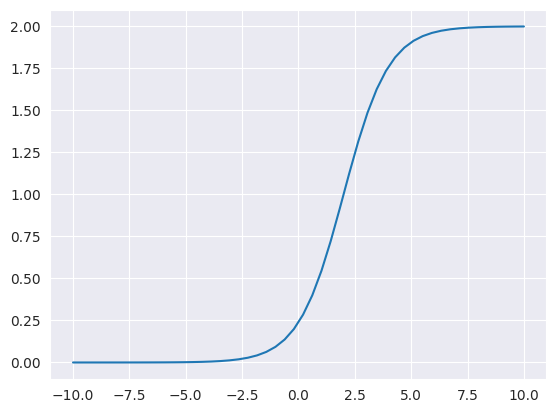

In [13]:
# An illustration of the logistic function

x = np.linspace(-10, 10, num=50)
M = 2
s = 1
mu = 2

# Sigmoid: M = 1, s = 1, mu = 0

y = M / (1 + np.exp(-(x - mu) / s))

plt.plot(x, y, "-")
plt.show()

Let's look at the same architecture and data, except that we will change the target variable to 0-1 vector. 

In [14]:
target = np.array([1, 0, 1, 0])
target

array([1, 0, 1, 0])

# Entropy and Cross-Entropy

In evaluating a model's accuracy, we need a measure between our model's prediction and a perfect (out-of-sample) prediction. This measure should be able to account for the fact that some outcomes (targets) are easier to predict than others. Consider the task of predicting the weather (sunshine/rain) in a deser, where it almost never rains. A model that always predicts sunshine will be correct most of the time, but it is not a very useful model as you will always be surprised when it rains.

The *entropy* of a distribution is a measure of its uncertainty that has four properties

- It is zero if the distribution is degenerate (i.e. the outcome is always sunshine)
- It is continuous, so a small change in the distribution will result in a small change in the entropy
- It is higher for distributions with can produce more different outcomes than for distributions that can produce fewer outcomes
- It is additive, so the entropy of a distribution is the sum of the entropies of its components. This means that if we first measure the uncertainty about being male/female and then measure the uncertainty about being a soccer fan or not, the uncertainty of the combinations (male/soccer fan, male/not soccer fan, female/soccer-fan, female/not soccer fan) should the sum of the two uncertainties.

It is easy to show that the entropy defined as the expected value of the log-probabilities of the outcomes satisfies these four properties.

$$
H(p) = \sum_{i} p_i \log p_i
$$

So the entropy gives us the uncertainty when predicting outcomes using the true distribution. In classification problems, however, we don't know this distribution. Instead, we rely on a model to produce probabilities that we hope are close to the true probabilities. We can ask: how much does the uncertainty increase if we use the wrong (the model's) probabilities (Q) instead of the true probabilities? This is the *cross-entropy*.

$$
H(P, Q) = H(p) + \text{KL}(p, q)
$$

In the above expression, H(p) is the entropy of the data-generating distribution, and KL(p, q) is the Kullback-Leibler divergence between the data-generating distribution and the model distribution. The KL divergence is always non-negative, and it is zero if the two distributions are identical. Therefore, the cross-entropy is always greater than or equal to the entropy of the data-generating distribution.

$$
\text{KL} = \sum_{i} p_i (\log p_i - \log q_i) = \sum_{i} p_i \log \frac{p_i}{q_i}
$$

The KL-divergence describes how different P and Q are on average (in units of entropy). You have likely encountered a scaled version of it when studying generalized linear models (GLM) under the name of *deviance*. The deviance is the KL-divergence between the data-generating distribution and the model distribution, scaled by a factor of two.  


In [15]:
p = np.array([0.1, 0.9])
q = np.array([0.1, 0.9])

# Cross entropy
ce = np.sum(p * np.log(q))
ce

-0.3250829733914482

In [16]:
# Entropy of p
ep = np.sum(p * np.log(p))
ep

-0.3250829733914482

In [17]:
# KL divergence
ce - ep

0.0

The cross-entropy (CE) loss is often used classification problems. Given a model that produces predicted probabilities for $c = 1,\ldots, C$ classes $\hat{y}_1, \ldots, \hat{y}_C$ (that sum to one) and true probabilities $y_1, \ldots, y_C$, the CE loss for a single observation is defined as

$$
\xi(y_i, \hat{y}_i) = -\sum_{c = 1}^{C} y_{ci} \log \hat{y}_{ci}
$$

In classification problems like the logistic model, where each observation belongs to its true class with probability 1, the CE loss is simply the negative log-likelihood of the data. The vectors $y_i$ containing the true probability distribution are called *one-hot* encoded vectors.

For example, let's have a problem with three classes ($C = 3$) and four observations ($N = 3$). The first and the last observations belong to the first class, the second observation belongs to the second class, and the third observation belongs to the third class.

$$
y_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \quad \\
y_2 = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \quad \\
y_3 = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} \quad \\
y_4 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \quad \\
$$

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


sigmoid(0.2)

0.549833997312478

Let's see how this could work with numpy.

In [19]:
# The net value of the neuron is the same as before
z = sample1.dot(w)

# The outputut of the neuron is now the predicted probability

p_pred = sigmoid(z)
p_pred

0.7109495026250039

In [20]:
# The loss is the CE loss
- target[0] * np.log(p_pred)

0.3411538747320879

## Homework

Implement the gradient descent algorithm for the logistic regression model. Compare the results with the sklearn implementation.


# Hidden layer classification network

The problem of using only an output neuron is that it cannot accommodate non-linear relationships. We will take the moons dataset as an example.

We will train a simple hidden layer neural network with one hidden layer with three neurons. The output layer will have two neurons with a softmax activation.

![Simple network](https://peterroelants.github.io/images/neural_net_implementation/SimpleANN04.png)


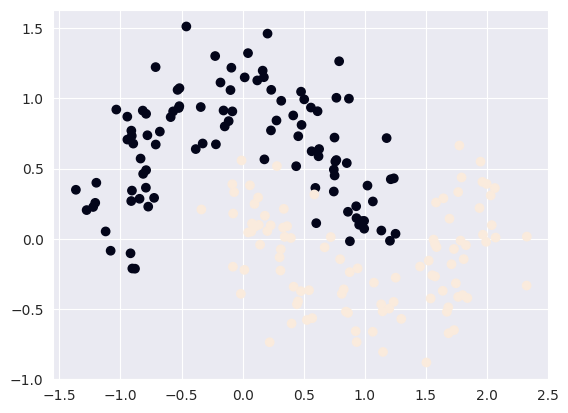

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.2, random_state=43)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## The forward pass

To produce predictions, we need to initialize the weights and then use these together with the inputs to calculate the predicted probabilities. This is called the forward pass. For simplicity, we will omit the bias terms.

Let $\mathbf{X}_{N\times K}$ be a matrix of inputs.

$$
\mathbf{X} = \begin{pmatrix} 
x_{11} & x_{12} & \ldots & x_{1K} \\
x_{21} & x_{22} & \ldots & x_{2K} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \ldots & x_{NK} \\
\end{pmatrix}
$$

Let $\mathbf{W}^{h}_{K\times M}$ be the matrix of weights mapping the inputs to the hidden layer (with $M = 3$) neurons in our case. As we will consider two inputs $K = 2$.

$$
z^{h}_{N \times M} = \mathbf{X} \mathbf{W}^{h}
$$

In our example we have two inputs and three neurons in the hidden layer. The net values of the hidden layer are given by


Let's see this for a single training sample (one observation).

$$
\mathbf{X} = \begin{pmatrix}
x_{i1} & x_{i2} \\
\end{pmatrix}
$$

$$
\mathbf{W}^h = \begin{pmatrix}
w^h_{11} & w^h_{12} & w^h_{13} \\
w^h_{21} & w^h_{22} & w^h_{23} \\
\end{pmatrix}
$$

The result will be a $1 \times 3$ matrix of net values of the hidden layer.

$$
\mathbf{z}^h = X W^h = \begin{pmatrix}
x_{i1} w^h_{11} + x_{i2} w^h_{21} &
x_{i1} w^h_{12} + x_{i2} w^h_{22} &
x_{i1} w^h_{13} + x_{i2} w^h_{23} \\
\end{pmatrix} 
$$


$$
\begin{pmatrix}
z^{h}_{11} & z^{h}_{12} & z^{h}_{13} \\
\end{pmatrix}
$$

We obtain the outputs of the hidden layer by passing the net values through the activation function. The activation function is applied *element-wise*.

$$
\mathbf{h}_{N \times M} = \sigma(\mathbf{z}^h)
$$

In our example with one training sample and 3 hidden neurons this will be a $1 \times 3$ matrix.

The next step is to map the output values of the hidden layer ot the output layer. Let $\mathbf{W}^o$ be an $M \times C$ matrix of weights mapping the hidden layer to the output layer. In our example this will be a $3 \times 2$ matrix.

$$
\mathbf{W}^o = \begin{pmatrix}
w^h_{11} & w^h_{12} \\
w^h_{21} & w^h_{22} \\
w^h_{31} & w^h_{32} \\
\end{pmatrix}
$$

$$
\mathbf{z}^o = \mathbf{h} \mathbf{W}^o = \begin{pmatrix}
h_{11} w^h_{11} + h_{12} w^h_{21} + h_{13} w^h_{31} &
h_{11} w^h_{12} + h_{12} w^h_{22} + h_{13} w^h_{32} \\
\end{pmatrix}
$$

So we have obtained the $1 \times 2$ matrix of net values of the output layer. This is not the final output, though, as we must pass the matrix $o$ through the softmax function.

The output of the softmax function is a matrix of probabilities. The rows of the matrix sum to one. In the case of $C = 2$ classes,
the softmax function is equivalent to the sigmoid function.

$$
Y_{N \times C} = \text{softmax}(o) = \frac{e^{o}}{\sum_{j = 1}^{C} e^{oj}} = \frac{e^{\mathbf{H}W_o}}{\sum_{j = 1}^{C} e^{\mathbf{H}W_{oj}}}
$$

$$
Y_{N \times C} = \begin{pmatrix}
y_{11} & y_{12} \\
y_{21} & y_{22} \\
\vdots & \vdots \\
y_{N1} & y_{N2} \\
\end{pmatrix} 
$$

Let's implement the forward pass in numpy.

# Backpropagation and Gradient Descent

Now that we have the predictions, we can start computing the gradients of the loss function with respect to the weights. We will start with the weights of the output layer. We will use the cross-entropy function discussed above. Note that $y_i$ and $\hat{y}_i$ are $C$-dimensional vectors here.

$$
\xi(Y, \hat{Y}) = -\frac{1}{N} \sum_{i = 1}^{N} \sum_{c = 1}^{C} y_{ic} \log \hat{y}_{ic} = \sum_{i = 1}^{N} \xi(y_i, \hat{y}_i)
$$

As in the simple examples of linear regression and logistic regression, we will need the derivatives of the loss function with respect to all model parameters (the weights) so that we can apply gradient descent.

There are $M \times C$ ($3 \times 2$) weights mapping the hidden to the output layer, wo the Jacobian matrix will be $M \times C$.

$$
\nabla_{\mathbf{W}^o} \xi = \begin{pmatrix}
\frac{\partial \xi}{\partial w_{o11}} & \frac{\partial \xi}{\partial w_{o12}} \\
\frac{\partial \xi}{\partial w_{o21}} & \frac{\partial \xi}{\partial w_{o22}} \\
\frac{\partial \xi}{\partial w_{o31}} & \frac{\partial \xi}{\partial w_{o32}} \\
\end{pmatrix}
$$

There are $K \times M$ weights in the matrix mapping the inputs to the hidden layer, so the Jacobian matrix will be $K \times M$ ($2 \times 3)$.

$$
\nabla_{\mathbf{W}^h} \xi = \begin{pmatrix}
\frac{\partial \xi}{\partial w_{h11}} & \frac{\partial \xi}{\partial w_{h12}} & \frac{\partial \xi}{\partial w_{h13}} \\
\frac{\partial \xi}{\partial w_{h21}} & \frac{\partial \xi}{\partial w_{h22}} & \frac{\partial \xi}{\partial w_{h23}} \\
\end{pmatrix}
$$

Backpropagation is an algorithm for computing the derivatives using the chain rule for differentiation. The chain rule states that the derivative of a function $f$ with respect to $x$ is given by

$$
\frac{\partial }{\partial x}f(g(x)) = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x}(x)
$$

In our case the loss depends on the weights of the network through the predicted probabilities. These are a function (softmax) of the net values of the output layer.  

![Backpropagation](https://i0.wp.com/analyticsarora.com/wp-content/uploads/2021/09/Understand-The-Backpropagation-Algorithm-Interview-Question.png?w=800&ssl=1)


Starting from the loss, we will apply the chain rule to compute all derivatives.

## Output Layer Gradient

### Softmax Derivative

The softmax function is given by

$$
s(z_{ok}) = \frac{e^{z_{ok}}}{\sum_{j = 1}^{C} e^{z_{oj}}}
$$

We need to distinguish two cases: $k = l$ and $k \neq l$.
In the first case the derivative is:

$$
\frac{\partial s(z_{ok})}{\partial z_{ok}} = \frac{e^{z_{ok}} \sum_{j = 1}^{C} e^{z_{oj}} - e^{z_{ok}} e^{z_{ok}}}{\left(\sum_{j = 1}^{C} e^{z_{oj}}\right)^2} = s(z_{ok}) - s(z_{ok})^2 = s(z_{ok})(1 - s(z_{ok}))
$$

In the second case the derivative is:

$$
\frac{\partial s(z_{ok})}{\partial z_{ol}} = \frac{-e^{z_{ok}} e^{z_{ol}}}{\left(\sum_{j = 1}^{C} e^{z_{oj}}\right)^2} = -s(z_{ok}) s(z_{ol})
$$

### Cross-Entropy Derivative

The derivative of the cross-entropy loss function with respect to the inputs of the softmax function is given by


\begin{align}
\frac{\partial \xi}{\partial z_i} & = - \sum_{c=1}^C \frac{\partial y_c \log(\hat{y}_c)}{\partial z_i}{} 
= - \sum_{c=1}^C y_c \frac{\partial \log(\hat{y}_c)}{\partial z_i} 
= - \sum_{c=1}^C y_c \frac{1}{\hat{y}_c} \frac{\partial \hat{y}_c}{\partial z_i} \\
& = - \frac{y_c}{\hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} - \sum_{c \neq i}^C \frac{y_c}{\hat{y}_c} \frac{\partial \hat{y}_c}{\partial z_i}
= - \frac{y_c}{\hat{y}_i} \hat{y}_i (1-\hat{y}_i) - \sum_{c \neq i}^C \frac{y_c}{\hat{y}_c} (-\hat{y}_c \hat{y}_i) \\
& = - y_i + y_i \hat{y}_i + \sum_{c \neq i}^C y_c \hat{y}_i = - y_i + \sum_{c = 1}^C y_c \hat{y}_i
= -y_i + \hat{y}_i \sum_{c = 1}^C y_c \\
& = \hat{y}_i - y_i
\end{align}

The last step uses the fact that the target vectors $y$ are on-hot encoded and sum to one.

We have already seen that the gradient of the cross-entropy loss function with respect to the weights of the output layer is given by:

$$
\delta_o = \frac{\partial \xi}{\partial Z^o} = (Y - \hat{Y})
$$

Here $Z^o$ is an $N \times C$ dimensional matrix of inputs to the softmax layer. $\mathbf{Y}$ is an $N \times C$ dimensional matrix.

$$
Z^o= \mathbf{H} \mathbf{W}^o
$$

The first weights that we need to update are the ones mapping the hidden layer to the output layer $W_o$ ($M \times C$).

Using the chain rule we can derive it as follows:

$$
\frac{\partial \xi}{\partial W_o} = \frac{\partial \xi}{\partial w_{oj}} \frac{\partial \xi}{\partial \mathbf{Y}} \frac{\partial \mathbf{Y}}{\partial \mathbf{Z^o}} \frac{\partial \mathbf{Z}_o}{\partial \mathbf{w}_{oj}} = \sum_{i = 1}^{N} h_{ij} (\hat{y}_{ij} - y_{i}) = \sum_{i = 1}^{N} h_{ij} \delta_{oj}
$$

We calculated the derivative with respect to $w_{oj}$, the $j$-th row of $\mathbf{W}^o$, which is a $1 \times 2$ vector. For the computer implementation it is useful to vectorize the operation. We can write the full Jacobian matrix as follows:

$$
\frac{\partial \xi}{\partial \mathbf{W}^o} = \mathbf{H}^T (\hat{\mathbf{Y}} - \mathbf{Y}) = \mathbf{H}^T \mathbf{\delta}_o
$$

This is a $3 \times 2$ matrix of partial derivatives.

$$
\mathbf{J}_{\mathbf{W}^o} = \begin{pmatrix}
\frac{\partial \xi}{\partial w_{o11}} & \frac{\partial \xi}{\partial w_{o12}} \\
\frac{\partial \xi}{\partial w_{o21}} & \frac{\partial \xi}{\partial w_{o22}} \\
\frac{\partial \xi}{\partial w_{o31}} & \frac{\partial \xi}{\partial w_{o32}} \\
\end{pmatrix}
$$

Let's implement these in Python

The component for the gradient descent method is the gradient of the loss function with respect to the weights of the hidden layer.

## Hidden Layer Gradient

To get the gradient of the loss with respect to the weights of the hidden layer, we need to first differentiate with respect to the output values of the hidden layer, then differentiate these output values of the with respect to the net values (sigmoid). Last, we will need to differentiate the net values with respect to the weights of the hidden layer.

$$
\frac{\partial \xi}{\partial \mathbf{W}^h} = \frac{\partial \xi}{\partial \mathbf{H}} \frac{\partial \mathbf{H}}{\partial \mathbf{Z}^h} \frac{\partial \mathbf{Z}^h}{\partial \mathbf{W}^h}
$$
 
When computing the derivatives here we need to account for the fact that the weights of the hidden layer enter the loss function through two distinct paths, so we need to sum the derivatives of the loss function with respect to the weights of the output layer for each hidden neuron. If this remains unclear, take a look at the Appendix that shows the derivation of the derivatives with respect to $w^h_{11}$ for a single sample from start to end. 

$$
\delta_h = \frac{\partial \xi}{\partial \mathbf{Z}^h} = \frac{\partial \xi}{\partial \mathbf{H}} \frac{\partial \mathbf{H}}{\partial \mathbf{Z}^h} = (\mathbf{Y} - \hat{\mathbf{Y}}) \mathbf{W}^{oT} \odot \mathbf{H} \odot (1 - \mathbf{H})
$$

$\odot$ signifies element-wise multiplication.

# Appendix

## Derivative

Although the backpropagation is simply an application of the chain rule from calculus, it may be difficult to follow all the details. Let's take a look at the derivatives of the loss function with respect to the weights of the hidden layer for a single sample. We will start with the derivative of the loss function with respect to $w^h_{11}$.

$$
\begin{align}
\frac{\partial \xi}{\partial w^h_{11}} & = \frac{\partial \xi}{\partial w^h_{11}}(y_1 \log \hat{y}_1 + y_2\log \hat{y}_2) \\
& = \frac{\partial \xi}{\partial \hat{y}_1} \frac{\partial \hat{y}_1}{\partial w^h_{11}} + \frac{\partial \xi}{\partial \hat{y}_2} \frac{\partial \hat{y}_2}{\partial w^h_{11}} \\
& = \frac{\partial \xi}{\partial \hat{y}_1} \frac{\partial \hat{y}_1}{\partial z^o_1} \frac{\partial z^o_1}{\partial w^h_{11}} + \frac{\partial \xi}{\partial \hat{y}_2} \frac{\partial \hat{y}_2}{\partial z^o_2} \frac{\partial z^o_2}{\partial w^h_{11}} \\
& = \frac{y_1}{\hat{y}_1}\hat{y}_1(1 - \hat{y}_1)\frac{\partial z^o_1}{\partial w^h_{11}} - y_2 \hat{y}_1 \frac{\partial z^o_2}{\partial w^h_{11}}
\end{align}
$$
Let's look at the derivative in the first term

$$
\begin{align}
\frac{\partial z^o_1}{\partial w^h_{11}} & = \frac{\partial}{\partial w^h_{11}}\left(\sigma(z^h_1)w^o_{11} + \sigma(z^h_2)w^o_{21} \right)\\
& = w^o_{11}\sigma(z^h_1)(1 - \sigma(z^h_1))\frac{\partial z^h_1}{\partial w^h_{11}} + w^o_{21}\sigma(z^h_2)(1 - \sigma(z^h_2))\frac{\partial z^h_2}{\partial w^h_{11}} \\
\end{align}
$$

The second term is zero due to the fact $w^h_{11}$ is not used to compute $z^h_2$. The derivative of the hidden layer net value with respect to the weight is simply the value of the input. Therefore, we have


$$
\begin{align}
\frac{\partial z^o_1}{\partial w^h_{11}} & = w^o_{11}\sigma(z^h_1)(1 - \sigma(z^h_1))x_1
\end{align}
$$

The derivative in the second term is

$$
\begin{align}
\frac{\partial z^o_2}{\partial w^h_{11}} & = \frac{\partial}{\partial w^h_{11}}\left(w^o_{12}\sigma(z^h_1) + w^h_{22} \sigma(z^h_{2})\right) \\
& = w^o_{12}\sigma(z^h_1)(1 - \sigma(z^h_1))x_1
\end{align}
$$

Substituting the derivatives back into the original equation, we have

$$
\begin{align}
\frac{\partial \xi}{\partial w^h_{11}} & = y_1(1 - \hat{y})\sigma(z^h_1)(1 - \sigma(z^h_1))w^o_{11} - y_2 \hat{y}_1 \sigma(z^h_1)(1 - \sigma(z^h_1))w^o_{12} \\
& = \sigma(z^h_1)(1 - \sigma(z^h_1))x_1\left(y_1(1 - \hat{y})w^o_{11} - y_2 \hat{y}_1 w^o_{12}\right)
\end{align}
$$


In [70]:
target = np.array(["a", "b", "a", "b"])
target

array(['a', 'b', 'a', 'b'], dtype='<U1')

In [22]:

target_Y = pd.get_dummies(y).astype(np.int32).values
target_Y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0,

In [78]:
inputs

,x0,x1,x2
0,1,1.0,2
1,1,2.5,3
2,1,8.0,4
3,1,7.0,5


In [38]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)


def forward_pass(X, model):
    Wh, Wo = model["Wh"], model["Wo"]

    # Compute the hidden layer net values
    zh = X @ Wh

    # Compute the hidden layer activations
    H = sigmoid(zh)

    # Compute the output layer net values
    zo = H @ Wo

    # Compute the output layer activations
    Y_hat = softmax(zo)

    return Y_hat


def backprop(X, Y, Wh, Wo):
    H = sigmoid(X @ Wh)
    Y_hat = softmax(H @ Wo)

    ErrOutp = Y_hat - Y

    # The gradient at the output layer
    JWo = H.T @ ErrOutp

    # The gradient at the hidden layer
    JWh = X.T @ (H * (1 - H) * ErrOutp @ Wo.T)

    return [JWh, JWo]


def update_weights(model, gradient, learning_rate):
    model["Wh"] = model["Wh"] - learning_rate * gradient[0]
    model["Wo"] = model["Wo"] - learning_rate * gradient[1]

    return model


def loss_ce(Y, Y_hat):
    return -np.sum(Y * np.log(Y_hat))


def train(inputs, target, learning_rate, epochs):
    model = {
        "Wh": np.random.rand(2, 3),
        "Wo": np.random.rand(3, 2)
    }
    for epoch in np.arange(epochs):
        gradient = backprop(inputs, target, model["Wh"], model["Wo"])
        model = update_weights(model, gradient, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss: {loss_ce(target, forward_pass(inputs, model))}")

    return model


trained_model = train(inputs=X, target=target_Y, learning_rate=0.01, epochs=int(5e3))

print("Final hidden weights")
print(trained_model["Wh"])

print("Final output weights")
print(trained_model["Wh"])


ValueError: operands could not be broadcast together with shapes (200,3) (200,2) 

In [36]:
X.shape

(200, 2)



## Sigmoid and tanh

It can be shown that it is a scaled and shifted version of the tanh function.

$$
\sigma(x) = \frac{1}{2} + \frac{1}{2}\tanh (x / 2)
$$

which is defined as:

$$
\tanh x = \frac{e^{x} - e{-x}}{e^{x} + e^{-x}}
$$

$$
\begin{align}
\sigma(x) & = \frac{1}{2}\left(1 + \tanh (x / 2)\right)\\
          & = \frac{1}{2}\left(1 + \frac{e^{x/2} - e^{-x/2}}{e^{x/2} + e^{-x/2}}\right) \\
          & = \frac{1}{2}\left(\frac{e^{x/2} + e^{-x/2} + e^{x/2} - e^{-x/2}}{e^{x/2} + e^{-x/2}}\right)\\
          & = \frac{1}{2}\left(\frac{2e^{x/2}}{e^{x/2} + e^{-x/2}}\right)\\
          & =\frac{e^{x/2}}{e^{x/2} + e^{-x/2}}\\
          & =\frac{e^{x/2}}{e^{x/2} + e^{-x/2}}\frac{e^{-x/2}}{e^{-x/2}}\\
          & = \frac{1}{1 + e^{-2x/2}}\\
          & = \frac{1}{1 + e^{-x}}\\
\end{align}
$$